# การวิเคราะห์ข้อมูล EEG brainwave
Mental Emotional Sentiment Classification with an EEG-based Brain-machine Interface เป็นงานวิจัยที่เกี่ยวกับการจัดหมวดหมู่อารมณ์และอารมณ์ของมนุษย์โดยใช้ข้อมูลจาก EEG (Electroencephalography) ซึ่งเป็นเทคนิคในการวัดกิจกรรมไฟฟ้าในสมอง โดยอินเทอร์เฟซระหว่างสมองและเครื่องจักร (Brain-machine Interface) เป็นตัวกลางที่ใช้ในการรวบรวมข้อมูลและวิเคราะห์แบบเชิงคุณภาพและปริมาณของสัญญาณไฟฟ้าในสมอง

ในงานวิจัยนี้มีการใช้ EEG ในการรวบรวมข้อมูลจากสมองของผู้ร่วมงานที่ถูกนำเสนอกับความรู้สึกหรืออารมณ์ที่เกิดขึ้นในช่วงเวลาที่กำหนด จากนั้น ข้อมูลที่ได้รับจะถูกนำไปวิเคราะห์และจัดหมวดหมู่เพื่อประมวลผลความรู้สึกหรืออารมณ์ที่เกิดขึ้นในเวลานั้น การจัดหมวดหมู่อารมณ์สามารถทำได้โดยใช้ขั้นตอนวิเคราะห์แบบเชิงคุณภาพและปริมาณของสัญญาณไฟฟ้าในสมองที่ได้รับจาก EEG

เพื่อให้สามารถประมวลผลและจัดหมวดหมู่อารมณ์ได้แม่นยำ การใช้เทคนิค Machine Learning เช่น Logistic Regression, Support Vector Machines (SVM), Neural Networks, หรือ Deep Learning เป็นที่นิยม เนื่องจากสามารถเรียนรู้และสร้างโมเดลที่สามารถจำแนกและทำนายอารมณ์ของผู้ใช้งานได้อย่างแม่นยำ


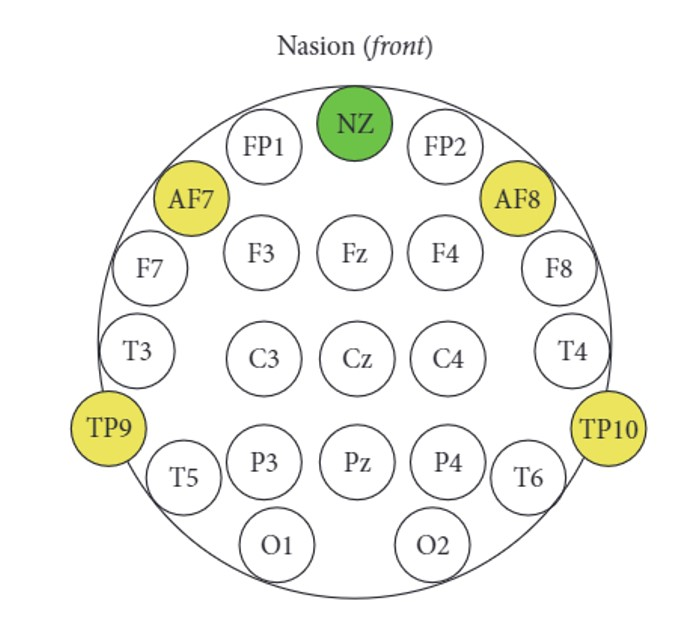

รูปแสดง EEG sensors ที่ติดบริเวณต่างๆ ได้แก่ TP9, AF7, NZ, AF8, และ TP10 เพื่อเก็บข้อมูล

ในการศึกษานี้ เป็นการเก็บข้อมูลสัญญาณ EEG ของ 2 คน (ชาย 1 คน และหญิง 1 คน) เมื่อได้ชมวิดีโอต่างๆ ดังนี้ 
ตาราง แสดงแหล่งที่มาของคลิปภาพยนตร์ที่ใช้เป็นสิ่งกระตุ้นสำหรับการเก็บข้อมูลสมองด้วย EEG

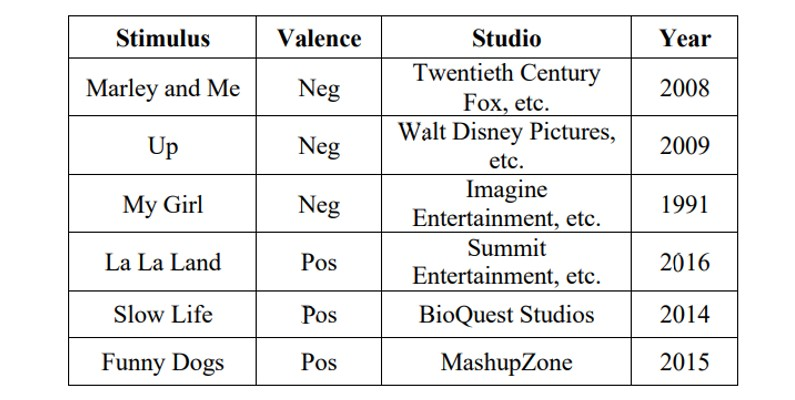

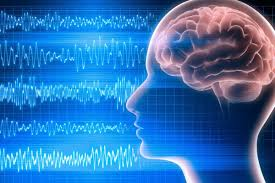

EGG brainwave (image credit: peterschreiber.media/Shutterstock)

*เอกสารอ้างอิง*

https://www.kaggle.com/code/arkhanzada/eeg-brain-signals-emotion-classification

https://www.researchgate.net/publication/329403546_Mental_Emotional_Sentiment_Classification_with_an_EEG-based_Brain-machine_Interface

https://www.researchgate.net/publication/335173767_A_Deep_Evolutionary_Approach_to_Bioinspired_Classifier_Optimisation_for_Brain-Machine_Interaction

# Supervised learning with EEG brainwave

Dataset: [EEG Brainwave Dataset: Feeling Emotions](https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions?resource=download) 

More information on data collection and data preprocessing can be found via [link](https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions?resource=download) 


เริ่มต้นด้วยการ mount Google Drive ที่ได้ download ข้อมูลมาเก็บไว้(?) และ import library ที่ต้องใช้

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # data visulization
sns.set_theme(style="ticks")

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
RANDOM_SEED = 2566

เราจะเชื่อมต่อ Google Colab เข้ากับ Google Drive ด้วยคำสั่งข้างล่าง โดยตำแหน่ง folder จะอยู่ที่ /content/drive/MyDrive
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ทำความเข้าใจชุดข้อมูล และเตรียมข้อมูล

In [ ]:
# Reading dataset
data = pd.read_csv('/content/drive/MyDrive/data/emotions.csv')

# Display the first 5 row of dataset
data.head()

,mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
# ตรวจสอบขนาดของ dataset
data_dim = data.shape
print('No. of data n_rows:', data_dim[0])
print('No. of data columns:', data_dim[1])

# แสดงชื่อของ columns
print(list(data.columns))

No. of data rows: 2132
No. of data columns: 2549
['mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2', 'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2', 'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a', 'mean_d_10_a', 'mean_d_11_a', 'mean_d_12_a', 'mean_d_13_a', 'mean_d_14_a', 'mean_d_15_a', 'mean_d_16_a', 'mean_d_17_a', 'mean_d_18_a', 'mean_d_19_a', 'mean_d_20_a', 'mean_d_21_a', 'mean_d_22_a', 'mean_d_23_a', 'mean_d_24_a', 'mean_d_25_a', 'mean_d_26_a', 'mean_d_27_a', 'mean_d_28_a', 'mean_d_29_a', 'mean_d_30_a', 'mean_d_31_a', 'mean_d_32_a', 'mean_d_33_a', 'mean_d_34_a', 'mean_d_35_a', 'mean_d_36_a', 'mean_d_37_a', 'mean_d_38_a', 'mean_d_39_a', 'mean_d_40_a', 'mean_d_41_a', 'mean_d_42_a', 'mean_d_43_a', 'mean_d_44_a', 'mean_d_45_a', 'mean_d_46_a', 'mean_d_47_a', 'mean_d_48_a', 'mean_d_49_a', 'stddev_0_a', 'stddev_1_a', 'stddev_2_a', 'stddev_3_a', 'stddev_4_a', 'stdd

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

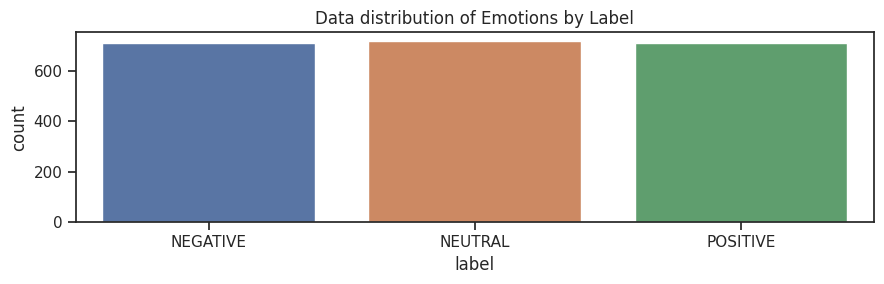

In [ ]:
# นับจำนวนข้อมูลของแต่ละค่าใน label
display(data['label'].value_counts())

# plot distribution
plt.figure(figsize=(9,3))
plt.title("Data distribution of Emotions by Label")
sns.countplot(data=data, x='label')
plt.tight_layout()
plt.show()

The distribution of emotions among 3 labels is almost balanced.

In [ ]:
_ = [c.split('___')[0].strip() for c in data.columns.str.replace(r'\d', '_')]
pd.Series(_).value_counts()

<ipython-input-6-67472dd5f631>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  _ = [c.split('___')[0].strip() for c in data.columns.str.replace(r'\d', '_')]


fft           1500
covmat         288
logm           156
correlate      150
mean_d         110
min_q          100
max_q          100
moments         40
eigen           24
mean            10
min_d           10
min             10
max_d           10
max             10
stddev_d        10
stddev          10
entropy__a       5
entropy__b       5
label            1
dtype: int64

เลือกเฉพาะ column ที่ขึ้นต้นด้วย  'fft_..' ซึ่ง frequency domain features ของ EEG signals ในชุดข้อมูลนี้

In [ ]:
fft_data = data.loc[:,'fft_0_b':'fft_749_b'].copy()
fft_data.shape

(2132, 750)

## Data visualization: FFT of EEG signals

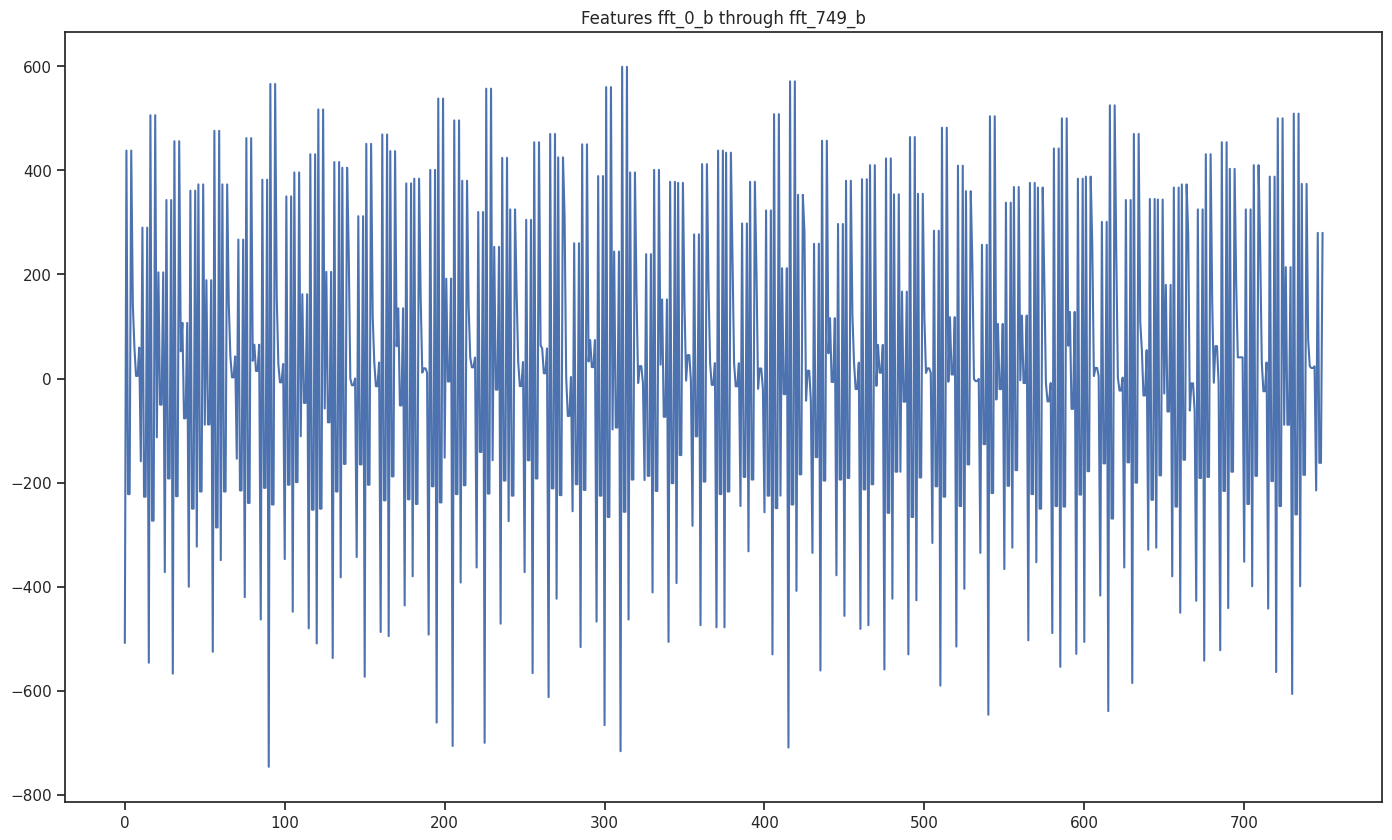

In [ ]:
sample_data = fft_data.loc[0,:]

plt.figure(figsize=(17, 10))
plt.plot(range(len(sample_data)), sample_data)
plt.title('Features fft_0_b through fft_749_b')
plt.show()

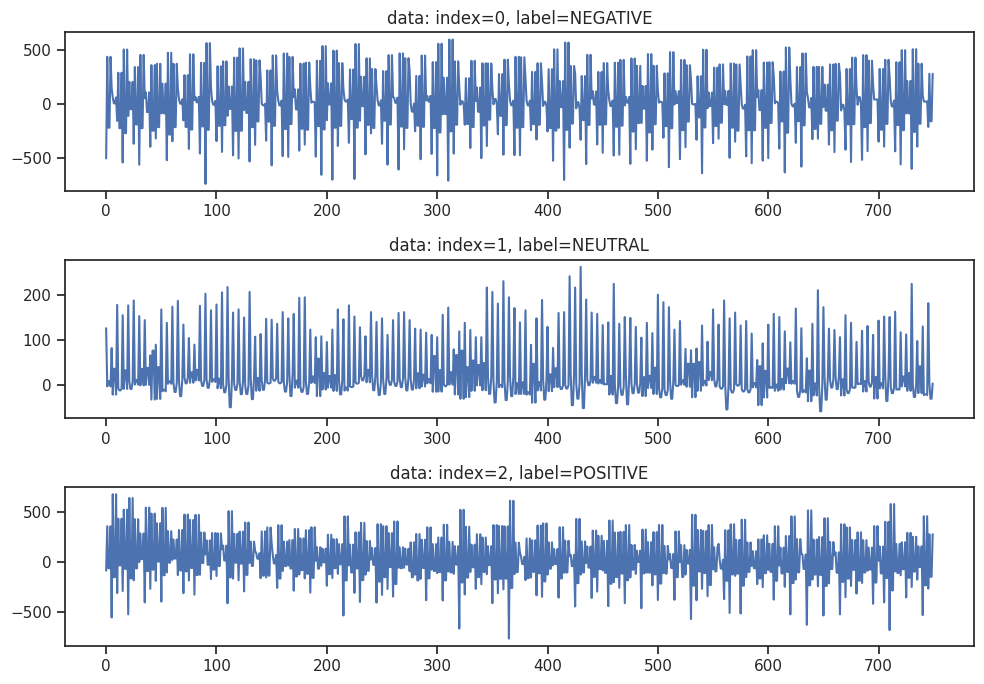

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 7))
ind=0;  sample_data = fft_data.loc[ind,:]
axs[0].plot(range(len(sample_data)), sample_data)
axs[0].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=1;  sample_data = fft_data.loc[ind,:]
axs[1].plot(range(len(sample_data)), sample_data)
axs[1].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=2;  sample_data = fft_data.loc[ind,:]
axs[2].plot(range(len(sample_data)), sample_data)
axs[2].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
plt.tight_layout()
plt.show()

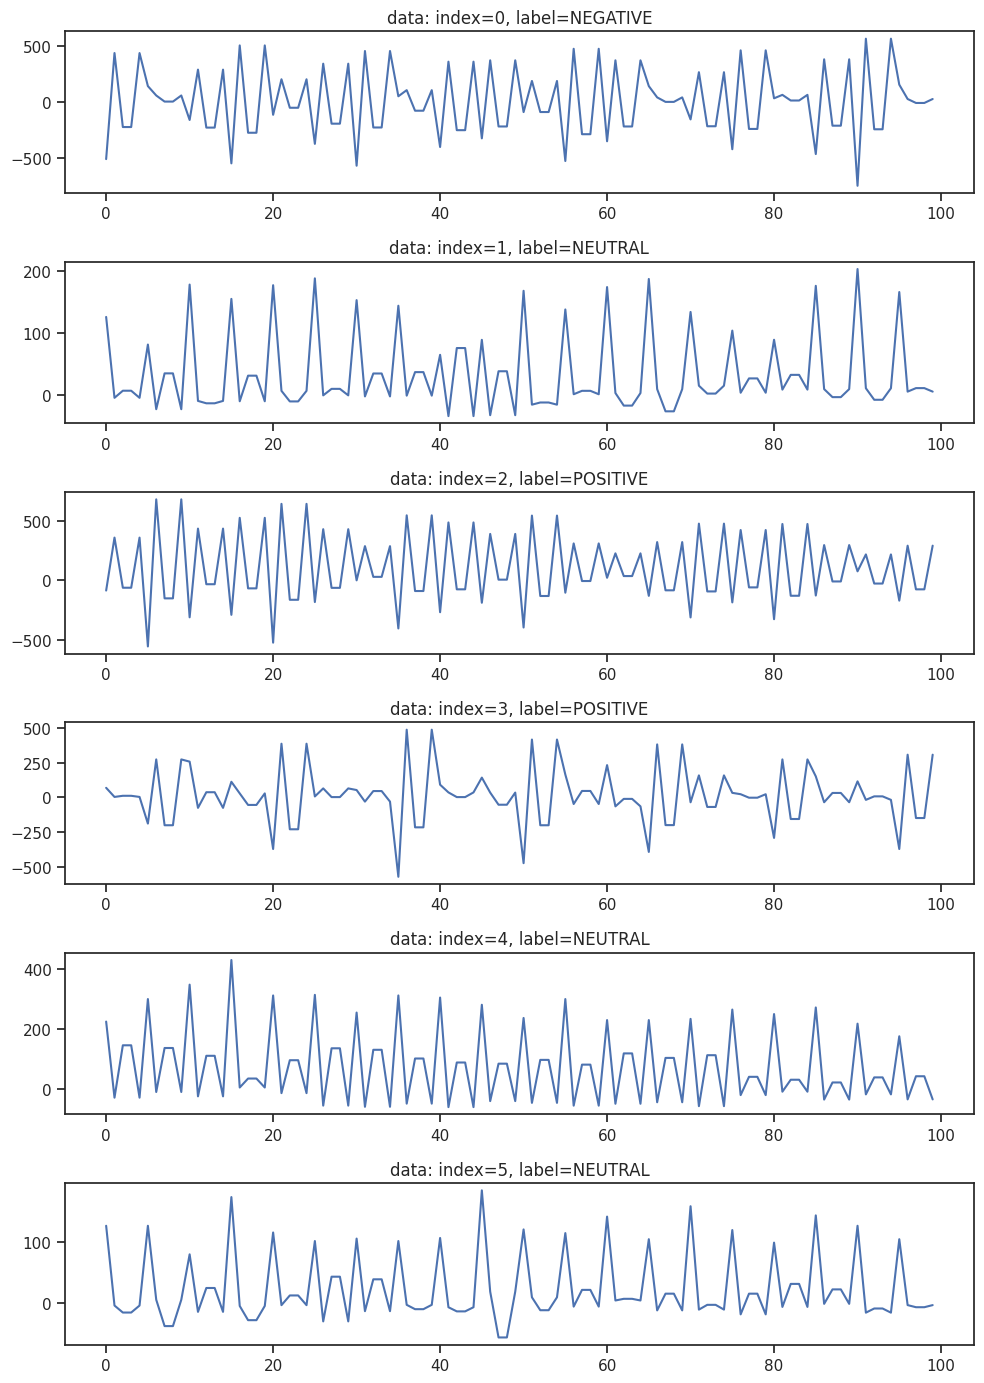

In [ ]:
fig, axs = plt.subplots(6, figsize=(10, 7*2))
ind=0;  sample_data = fft_data.iloc[ind,:100]
axs[0].plot(range(len(sample_data)), sample_data)
axs[0].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=1;  sample_data = fft_data.iloc[ind,:100]
axs[1].plot(range(len(sample_data)), sample_data)
axs[1].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=2;  sample_data = fft_data.iloc[ind,:100]
axs[2].plot(range(len(sample_data)), sample_data)
axs[2].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=3;  sample_data = fft_data.iloc[ind,:100]
axs[3].plot(range(len(sample_data)), sample_data)
axs[3].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=4;  sample_data = fft_data.iloc[ind,:100]
axs[4].plot(range(len(sample_data)), sample_data)
axs[4].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
ind=5;  sample_data = fft_data.iloc[ind,:100]
axs[5].plot(range(len(sample_data)), sample_data)
axs[5].set_title('data: index={}, label={}'.format(ind, data['label'][ind]))
plt.tight_layout()
plt.show()

In [ ]:
#Separating Positive, Neagtive and Neutral dataframes for plotting
neg_fft_data = fft_data.loc[data['label']=='NEGATIVE']
neg_fft_mean = neg_fft_data.mean(axis=0)
neu_fft_data = fft_data.loc[data['label']=='NEUTRAL']
neu_fft_mean = neu_fft_data.mean(axis=0)
pos_fft_data = fft_data.loc[data['label']=='POSITIVE']
pos_fft_mean = pos_fft_data.mean(axis=0)

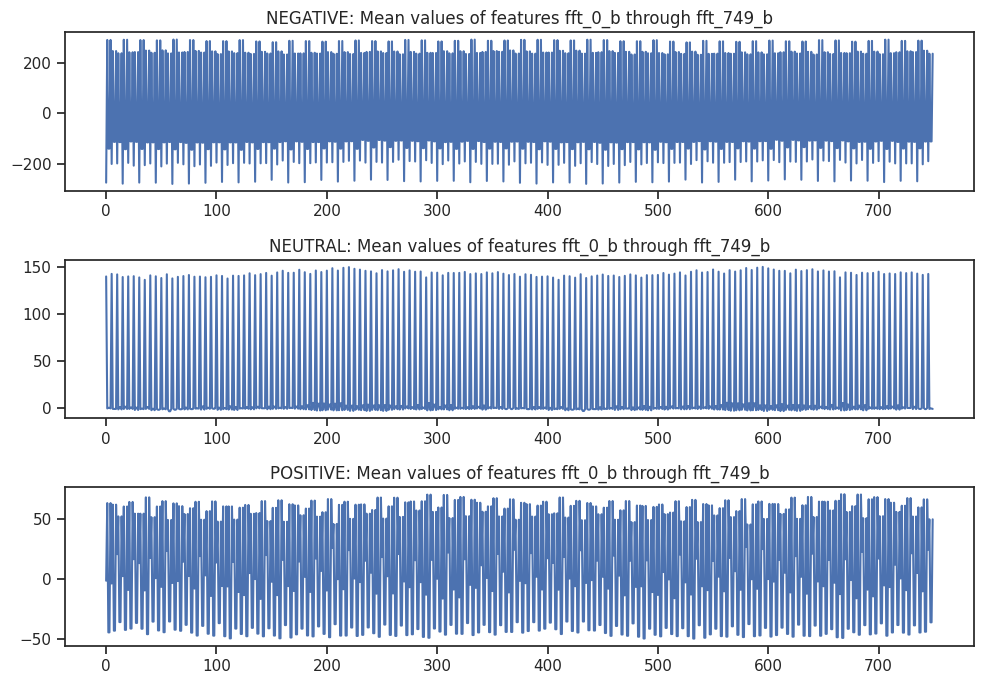

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 7))
axs[0].plot(range(len(neg_fft_mean)), neg_fft_mean)
axs[0].set_title('NEGATIVE: Mean values of features fft_0_b through fft_749_b')
axs[1].plot(range(len(neu_fft_mean)), neu_fft_mean)
axs[1].set_title('NEUTRAL: Mean values of features fft_0_b through fft_749_b')
axs[2].plot(range(len(pos_fft_mean)), pos_fft_mean)
axs[2].set_title('POSITIVE: Mean values of features fft_0_b through fft_749_b')
plt.tight_layout()
plt.show()

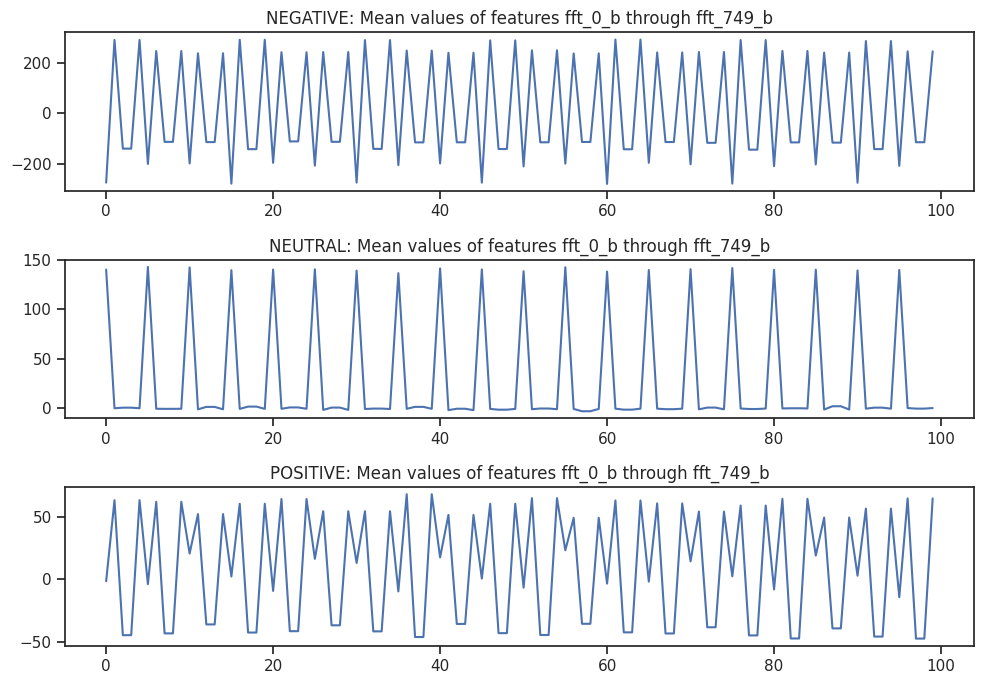

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 7))
axs[0].plot(range(len(neg_fft_mean.iloc[:100])), neg_fft_mean.iloc[:100])
axs[0].set_title('NEGATIVE: Mean values of features fft_0_b through fft_749_b')
axs[1].plot(range(len(neu_fft_mean.iloc[:100])), neu_fft_mean.iloc[:100])
axs[1].set_title('NEUTRAL: Mean values of features fft_0_b through fft_749_b')
axs[2].plot(range(len(pos_fft_mean.iloc[:100])), pos_fft_mean.iloc[:100])
axs[2].set_title('POSITIVE: Mean values of features fft_0_b through fft_749_b')
plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
t=range(fft_data.shape[1])

# Calculate the power spectrum
power_spectrum = np.abs(fft_data) ** 2

# Find the dominant frequency (period)
dominant_frequency_index = np.argmax(power_spectrum.iloc[0,:50])
dominant_frequency = np.fft.fftfreq(len(signal), d=t[1] - t[0])[dominant_frequency_index]

# Calculate the period
period = 1 / dominant_frequency

print('dominant Frequency Index:',dominant_frequency_index)
print('Dominant Frequency:', dominant_frequency)
print('Period:', period)

dominant Frequency Index: 30
Dominant Frequency: 0.03
Period: 33.333333333333336


## Data selection by data correlation

In [ ]:
corr_matrix = fft_data.corr()
abs_corr_matrix = abs(corr_matrix)

In [ ]:
# Select upper or lower triangle of correlation matrix
upper = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool_))
lower = abs_corr_matrix.where(np.tril(np.ones(abs_corr_matrix.shape), k=-1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.8
corr_threshold = 0.80
to_drop_upper = [column for column in upper.columns if any(upper[column] > corr_threshold)]
to_drop_lower = [column for column in upper.columns if any(lower[column] > corr_threshold)]
print('[Upper Triangle]# of cols to drop:',len(to_drop_upper))
print('[Lower Triangle]# of cols to drop:',len(to_drop_lower))
to_drop = min(to_drop_upper,to_drop_lower)

# Drop highly correlated features
low_corr_sel_data = fft_data.drop(fft_data[to_drop], axis=1)
print('Low-corr features shape:',low_corr_sel_data.shape)

[Upper Triangle]# of cols to drop: 746
[Lower Triangle]# of cols to drop: 745
Low-corr features shape: (2132, 5)


In [ ]:
list(low_corr_sel_data.columns)

['fft_738_b', 'fft_739_b', 'fft_744_b', 'fft_748_b', 'fft_749_b']

# AI Pipeline

In [ ]:
#x = data.iloc[:, :-1]#
x = fft_data
y = data['label'].copy()

display(x.head(5))
display(y.head(5))

,mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


0    NEGATIVE
1     NEUTRAL
2    POSITIVE
3    POSITIVE
4     NEUTRAL
Name: label, dtype: object

In [ ]:
# แปลงข้อมูล y ทีมีลักษณะ categorical ให้เป็นตัวเลข
y = y.map({'NEGATIVE':0, 'NEUTRAL':1, 'POSITIVE':2})
y.head(5)

0    0
1    1
2    2
3    2
4    1
Name: label, dtype: int64

## แบ่งข้อมูลเป็น train-test และ cross-validation
โดยกำกับการแบ่งตามสัดส่วนคลาสของคำตอบ (stratification)

In [ ]:
# สร้าง training data และ test data โดยแบ่งจากชุดข้อมูล x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=RANDOM_SEED)

print('Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[['NEGATIVE' 566]
 ['NEUTRAL' 573]
 ['POSITIVE' 566]]
Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[['NEGATIVE' 142]
 ['NEUTRAL' 143]
 ['POSITIVE' 142]]


In [ ]:
# แบ่งข้อมูล training data ด้วย 5-fold cross-validation เพื่อ tune hyperparameter
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

## ทำการ standardize ข้อมูลทั้งหมด
ใช้ mean และ SD จาก training set ในการ standardize test set เพื่อป้องกัน information leak

In [ ]:
x_scaler = StandardScaler().fit(x_train)

x_train = x_scaler.transform(x_train)
x_test  = x_scaler.transform(x_test)

## เทรนโมเดล ด้วย base model (default hyperparameter)

Training Set: Classification report
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00       566
     NEUTRAL       1.00      1.00      1.00       573
    POSITIVE       1.00      1.00      1.00       566

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705


Test Set: Classification report
              precision    recall  f1-score   support

    NEGATIVE       0.97      1.00      0.98       142
     NEUTRAL       1.00      1.00      1.00       143
    POSITIVE       1.00      0.96      0.98       142

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



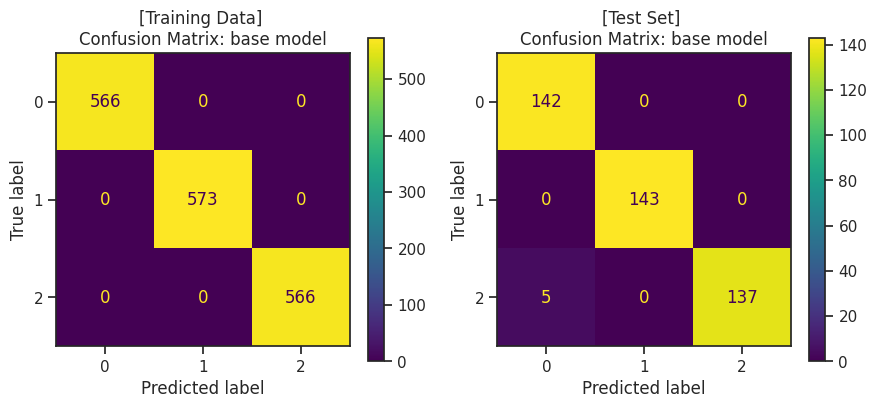

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# สร้างโมเดล
base_clf = RFC(random_state=RANDOM_SEED)

# สอนโมเดลด้วย training data
base_clf.fit(x_train,y_train)

# ให้โมเดลทำนาย training data
y_pred = base_clf.predict(x_train)

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของ training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: base model')

# ให้โมเดลทำนาย test data
y_pred = base_clf.predict(x_test)

# แสดงผล classification ของโมเดล
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))

# คำนวนและแสดงผล confusion matrix ของ test set
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: base model')

plt.tight_layout()
plt.show()

## Hyperparameter tuning, then เทรนโมเดล ด้วย tuned model

We will tune key hyperparameters: 

Best hyperparameters: {'max_depth': 7, 'n_estimators': 50}
Best cross-validation score: 0.93
Training Set: Classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      1.00      1.00       573
           2       1.00      0.96      0.98       566

    accuracy                           0.98      1705
   macro avg       0.99      0.98      0.98      1705
weighted avg       0.99      0.98      0.98      1705


Test Set: Classification report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       142
           1       0.97      0.99      0.98       143
           2       0.99      0.77      0.87       142

    accuracy                           0.92       427
   macro avg       0.93      0.92      0.92       427
weighted avg       0.93      0.92      0.92       427



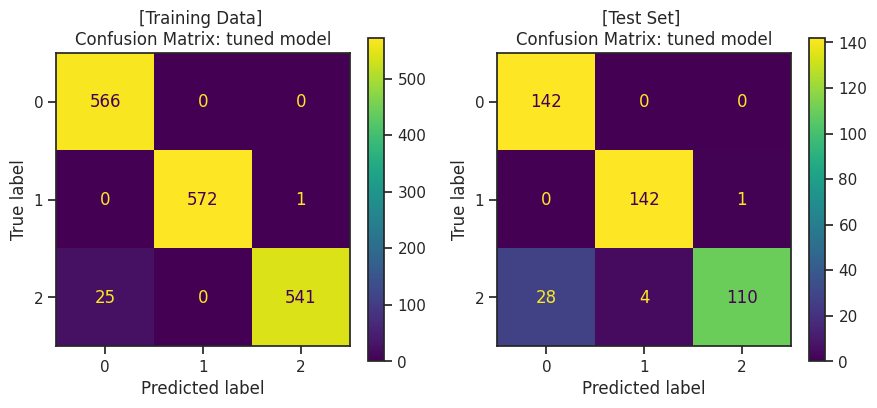

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
clf_params = {'n_estimators': [10,50,100,200],
              'max_depth': [3,5,7]
              }

# ใช้ GridSearchCV เพื่อสอนโมเดลจากชุดค่า hyperparameters จาก clf_params 
# และคำนวณค่า accuracy ของแต่ละโมเดล เพื่อเลือกชุด hyperparameters ที่ดีที่สุด
# โดยใช้เทคนิค cross-validation ในการแบ่งกลุ่ม validation data จาก training data
tuned_clf = GridSearchCV(estimator=base_clf, param_grid=clf_params, 
                             scoring=['accuracy'], refit='accuracy', cv=cv_splitter)

# fit โมเดลด้วย training data และ ให้โมเดลทำนายค่า y จาก training data
tuned_clf.fit(x_train, y_train)
y_pred = tuned_clf.predict(x_train)

# แสดงผล hyperparameters ที่ดีที่สุด และ cross-validation score
print('Best hyperparameters: {}'.format(tuned_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(tuned_clf.best_score_))

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของโมเดลจาก training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: tuned model')

# ให้โมเดลทำนายค่า y จาก test data
y_pred = tuned_clf.predict(x_test)

# แสดงผล classification ของโมเดล จาก test data
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))
# คำนวนและแสดงผล confusion matrix จาก test data
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: tuned model')

plt.tight_layout()
plt.show()

Best hyperparameters: {'max_depth': 7, 'n_estimators': 100}
Best cross-validation score: 0.98
Training Set: Classification report
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00       566
     NEUTRAL       1.00      1.00      1.00       573
    POSITIVE       1.00      1.00      1.00       566

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705


Test Set: Classification report
              precision    recall  f1-score   support

    NEGATIVE       0.97      1.00      0.98       142
     NEUTRAL       1.00      1.00      1.00       143
    POSITIVE       1.00      0.96      0.98       142

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



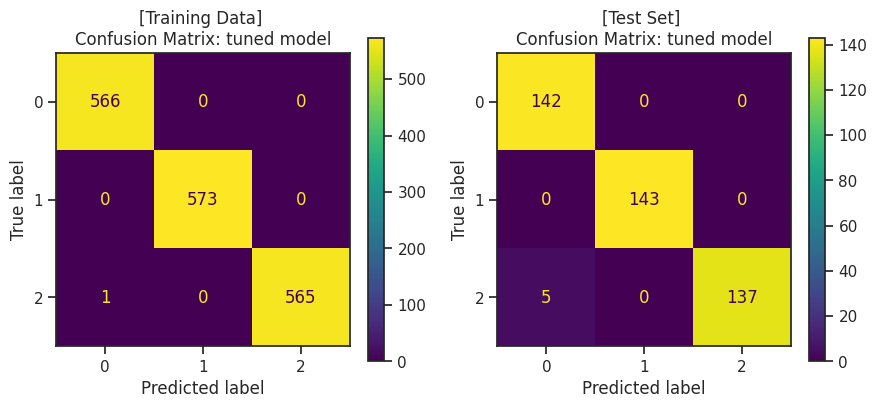

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
clf_params = {'n_estimators': [10,50,100,200],
              'max_depth': [3,5,7]
              }

# ใช้ GridSearchCV เพื่อสอนโมเดลจากชุดค่า hyperparameters จาก clf_params 
# และคำนวณค่า accuracy ของแต่ละโมเดล เพื่อเลือกชุด hyperparameters ที่ดีที่สุด
# โดยใช้เทคนิค cross-validation ในการแบ่งกลุ่ม validation data จาก training data
tuned_clf = GridSearchCV(estimator=base_clf, param_grid=clf_params, 
                             scoring=['accuracy'], refit='accuracy', cv=cv_splitter)

# fit โมเดลด้วย training data และ ให้โมเดลทำนายค่า y จาก training data
tuned_clf.fit(x_train, y_train)
y_pred = tuned_clf.predict(x_train)

# แสดงผล hyperparameters ที่ดีที่สุด และ cross-validation score
print('Best hyperparameters: {}'.format(tuned_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(tuned_clf.best_score_))

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของโมเดลจาก training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: tuned model')

# ให้โมเดลทำนายค่า y จาก test data
y_pred = tuned_clf.predict(x_test)

# แสดงผล classification ของโมเดล จาก test data
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))
# คำนวนและแสดงผล confusion matrix จาก test data
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: tuned model')

plt.tight_layout()
plt.show()